In [1]:
import matplotlib.pyplot as plt
# follow the tutorial at http://docs.lightkurve.org/tutorials/03-making-custom-apertures.html
from lightkurve import search_targetpixelfile
# get the pixel data for all quarters
pixelfile = search_targetpixelfile('KIC 10744554').download_all();

In [2]:
pixelfile

TargetPixelFileCollection of 14 objects:
	10744554 (14 KeplerTargetPixelFiles) Quarters: 1,2,3,4,5,6,8,9,10,12,13,14,16,17

/Users/steve/opt/anaconda3/lib/python3.8/site-packages/lightkurve/utils.py:459: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cax, ax=ax, norm=norm, label=clabel)
/Users/steve/opt/anaconda3/lib/python3.8/site-packages/lightkurve/utils.py:459: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cax, ax=ax, norm=norm, label=clabel)
/Users/steve/opt/anaconda3/lib/python3.8/site-packages/lightkurve/utils.py:459: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cax, ax=ax, norm=norm, label=clabel)
/Users/

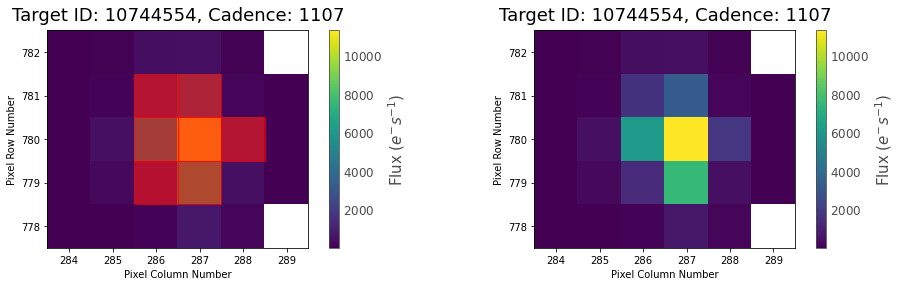

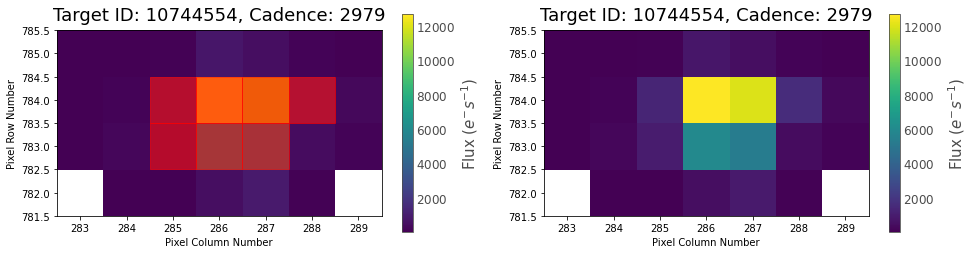

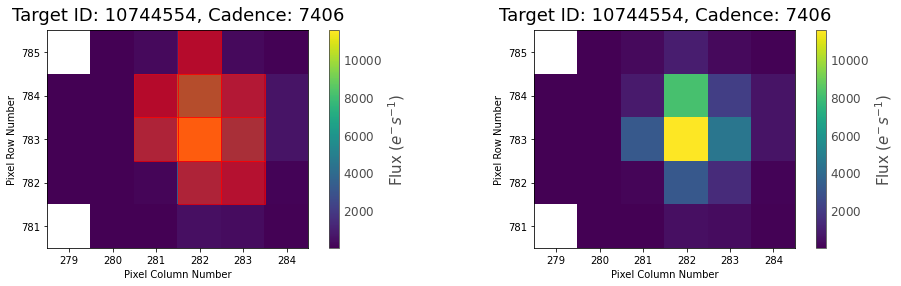

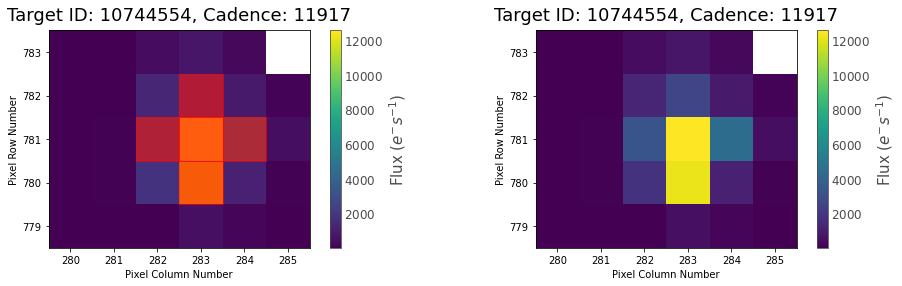

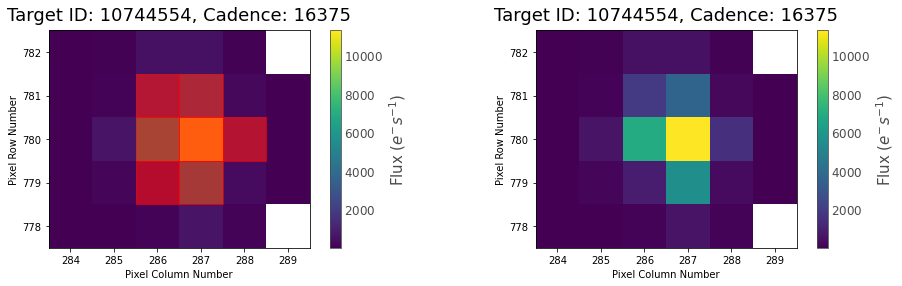

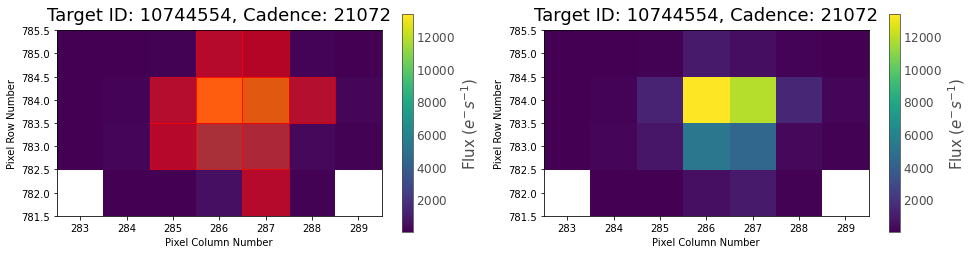

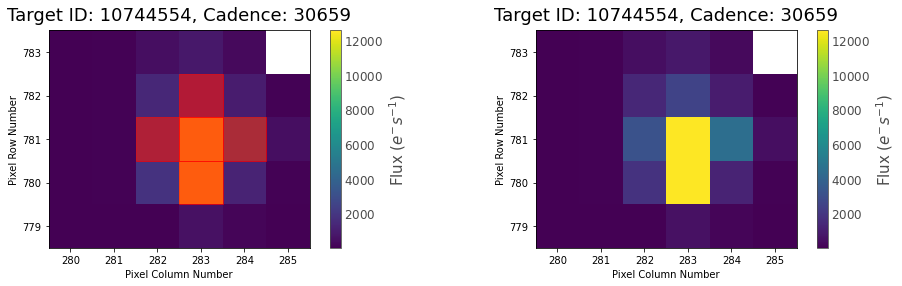

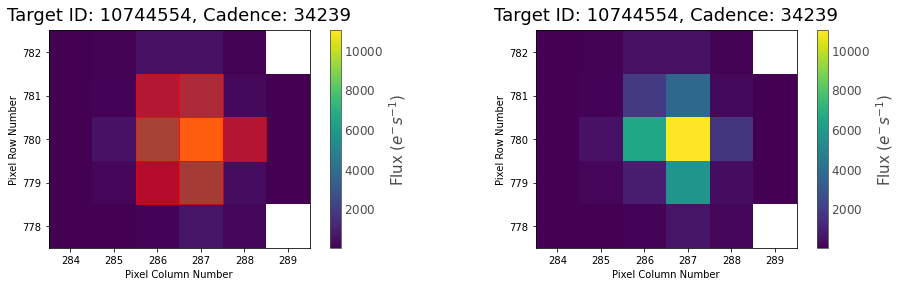

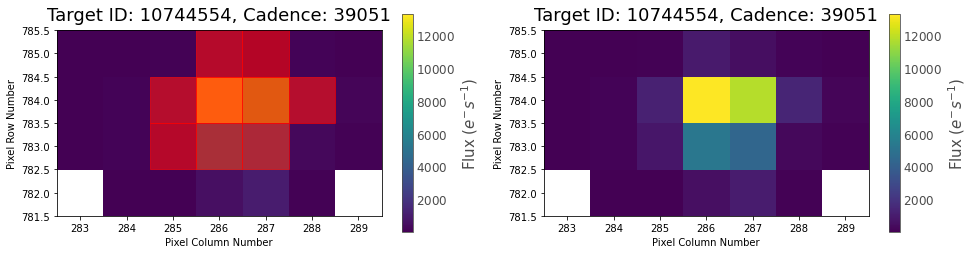

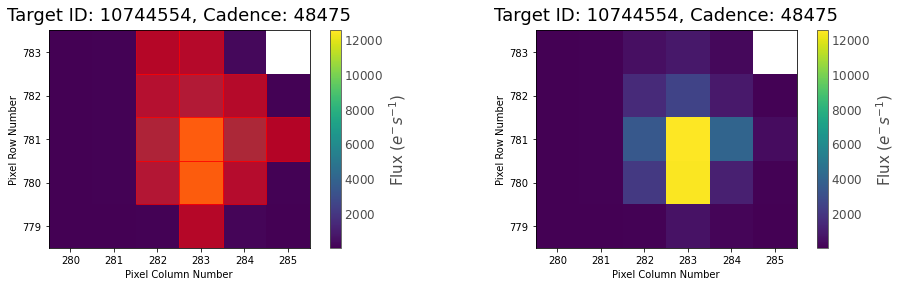

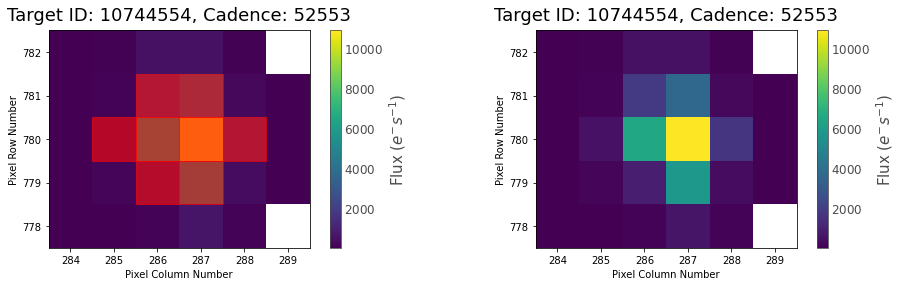

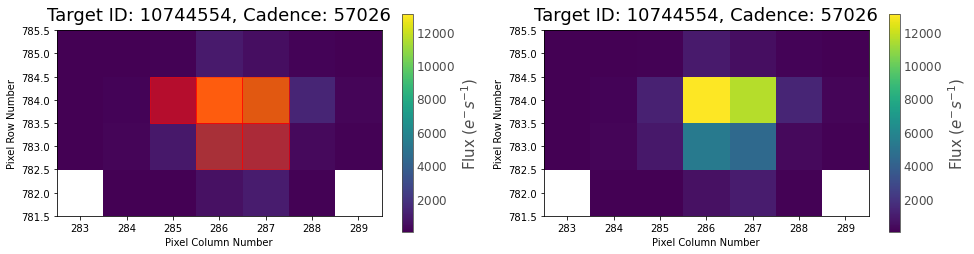

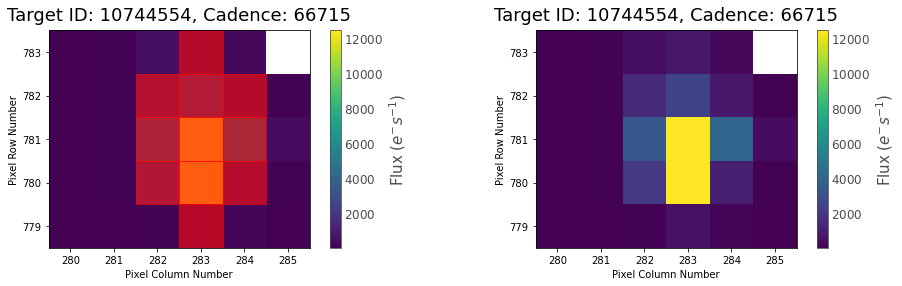

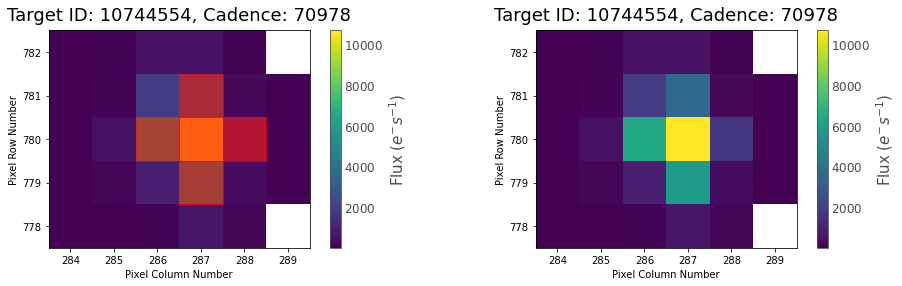

In [3]:
# Check the apertures for quarters where there is data

for quarter in range(len(pixelfile)):
    fig = plt.figure(figsize=plt.figaspect(0.25));
    ax = fig.add_subplot(1, 2, 1)
    pixelfile[quarter].plot(ax=ax, frame=2, aperture_mask=pixelfile[quarter].pipeline_mask, mask_color='red');

    ax = fig.add_subplot(1, 2, 2)
    pixelfile[quarter].plot(ax=ax, frame=2);



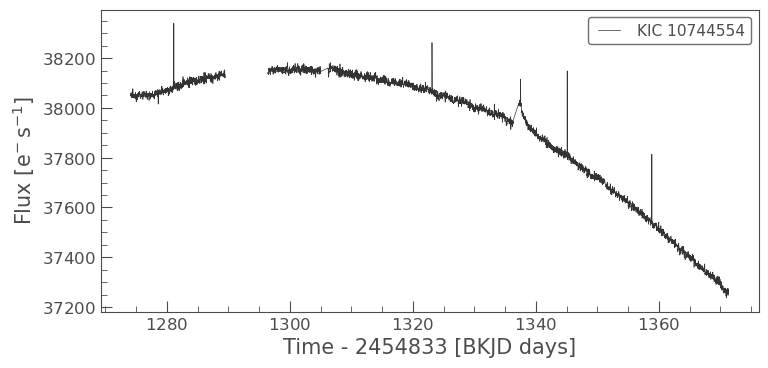

In [4]:
# plot the light curve of a sample quarter
quarter = 11

# make the light curve from the pixel file
lc = pixelfile[quarter].to_lightcurve();
lc.plot();


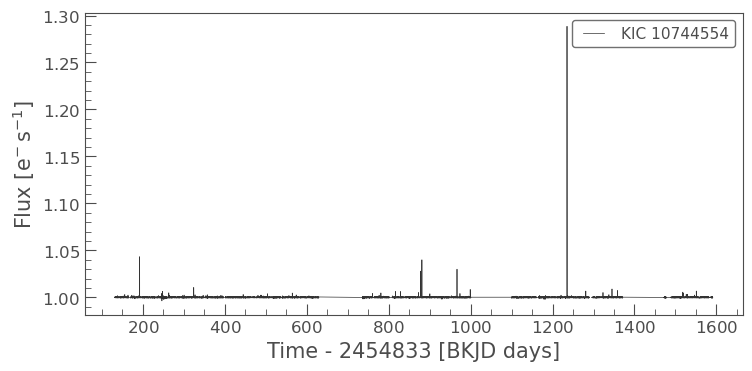

In [5]:
# make light curves out of the pixel data using all quarters, detrended by .flatten() so they line up together
lc = pixelfile[0].to_lightcurve().flatten();
for pf in pixelfile[1:]:
    lc = lc.append(pf.to_lightcurve().flatten())
lc.remove_nans().remove_outliers()

lc.plot();
# plt.ylim(1-0.01, 1+0.01);

In [6]:
lc.show_properties()

   Attribute                   Description                
--------------- ------------------------------------------
        channel                                         78
        quarter                                          1
       targetid                                   10744554
          label                               KIC 10744554
        mission                                     Kepler
    time_format                                       bkjd
     time_scale                                        tdb
      cadenceno                             array (51876,)
   centroid_col                             array (51876,)
   centroid_row                             array (51876,)
           flux                             array (51876,)
       flux_err                             array (51876,)
  flux_quantity                             array (51876,)
        quality                             array (51876,)
           time                             array (51876

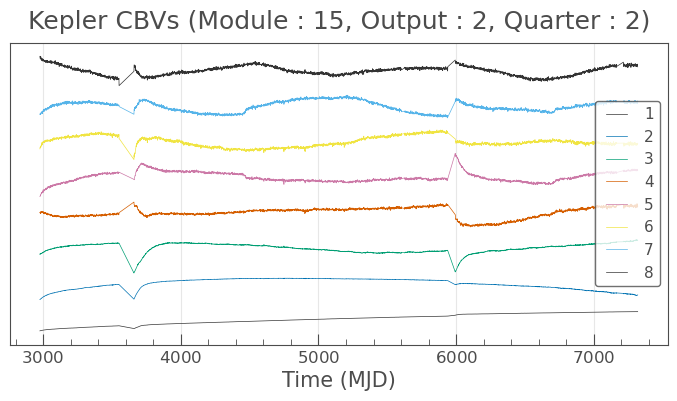

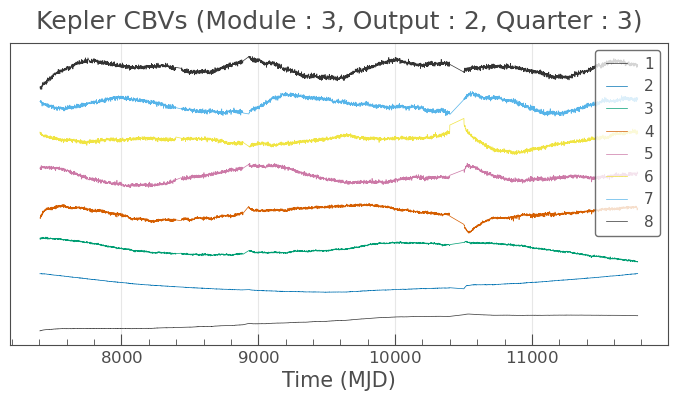

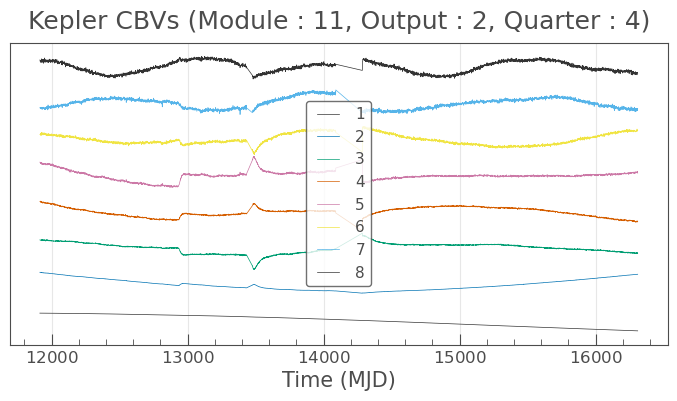

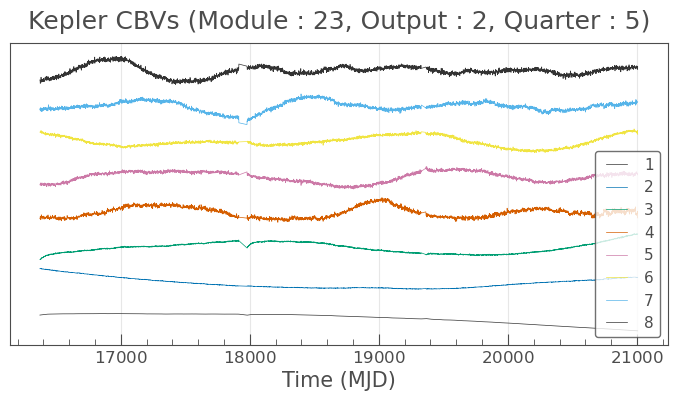

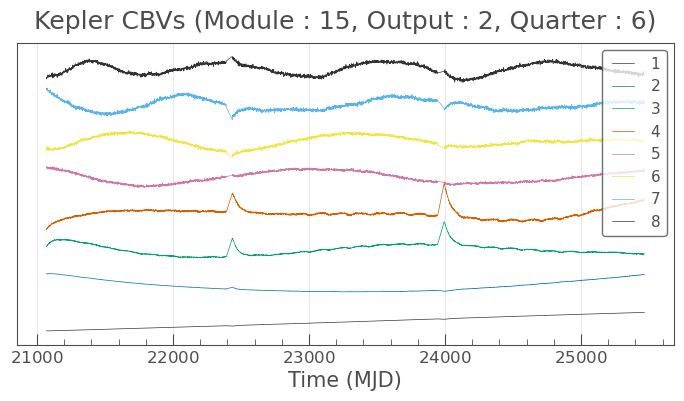

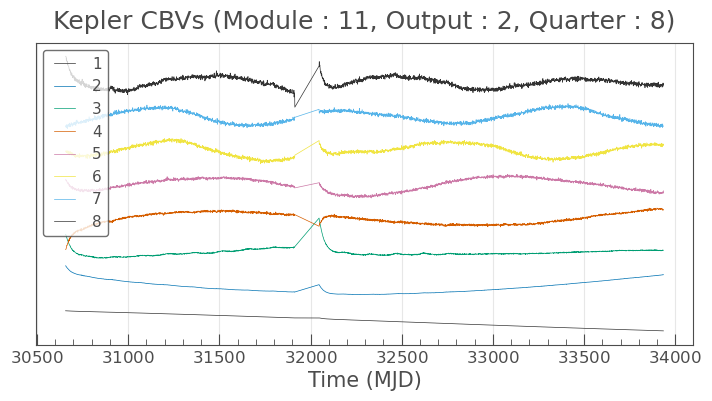

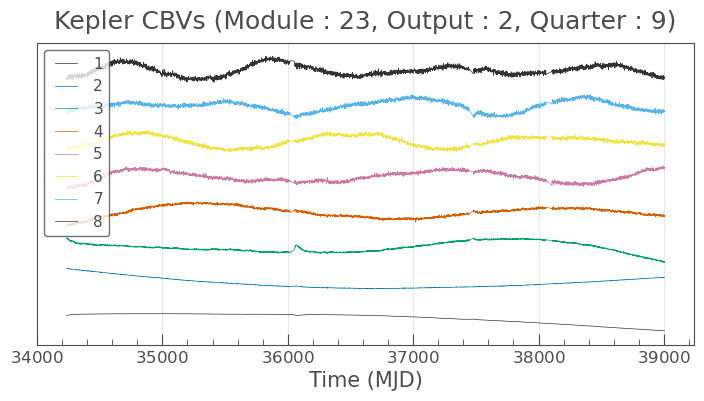

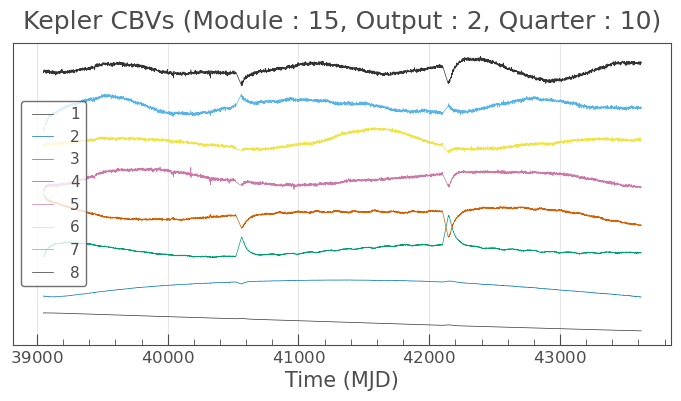

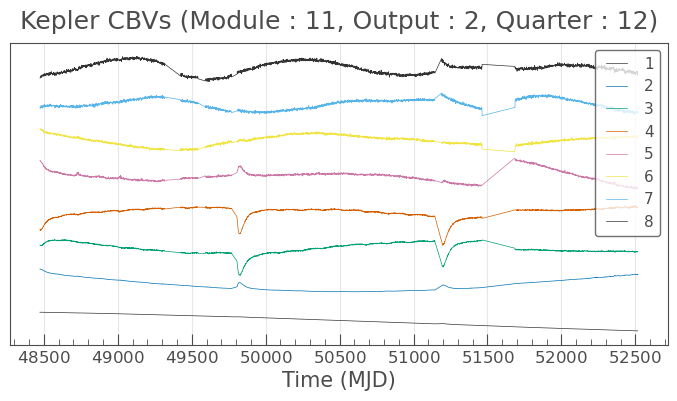

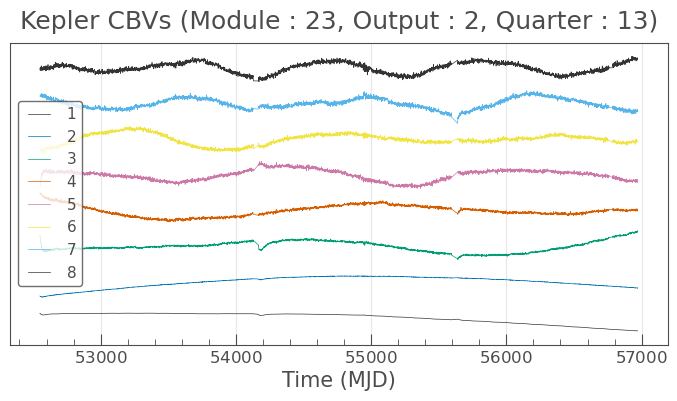

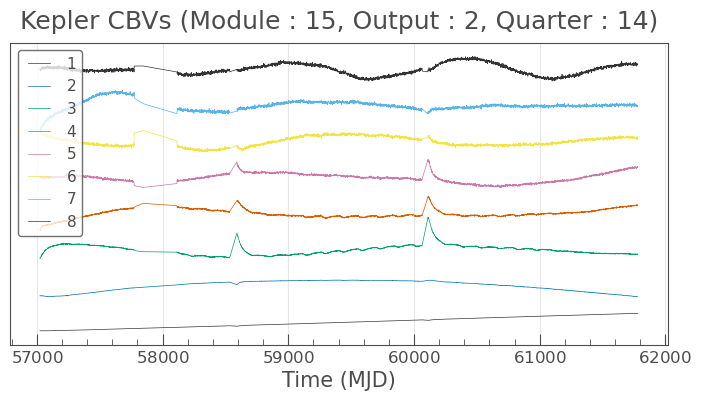

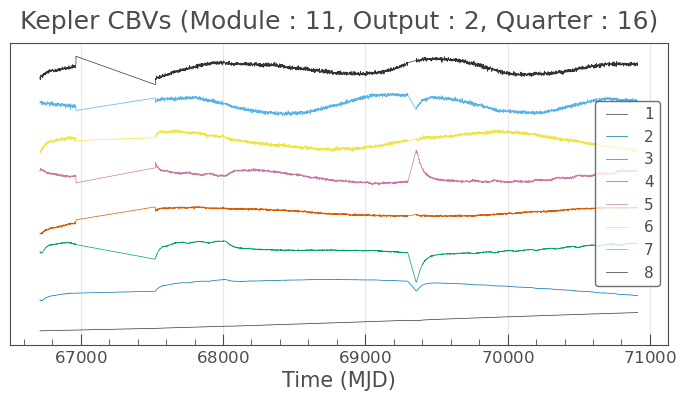

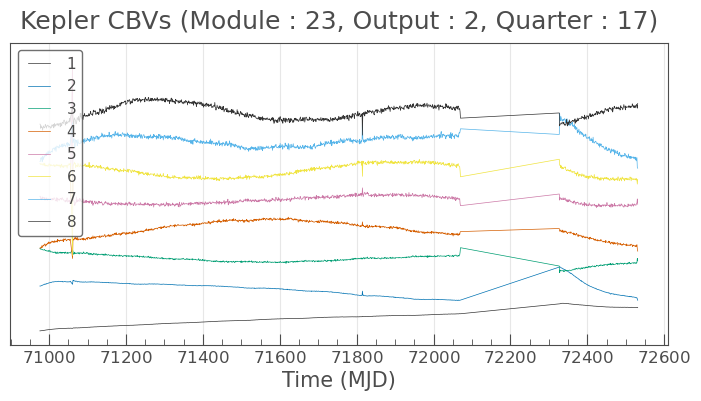

In [7]:
# remove signals that are common to all nearby stars using the Cotrending Basis Vectors (CBVs)

from lightkurve.correctors import KeplerCBVCorrector
# display the CBVs for each quarter
for pf in pixelfile[1:]:
    KeplerCBVCorrector(pf.to_lightcurve()).plot_cbvs([1,2,3,4,5,6,7,8]);

In [8]:
pf

KeplerTargetPixelFile Object (ID: 10744554)

In [9]:
pf.to_lightcurve()

KeplerLightCurve(ID: 10744554)

In [10]:
KeplerCBVCorrector(pf.to_lightcurve())

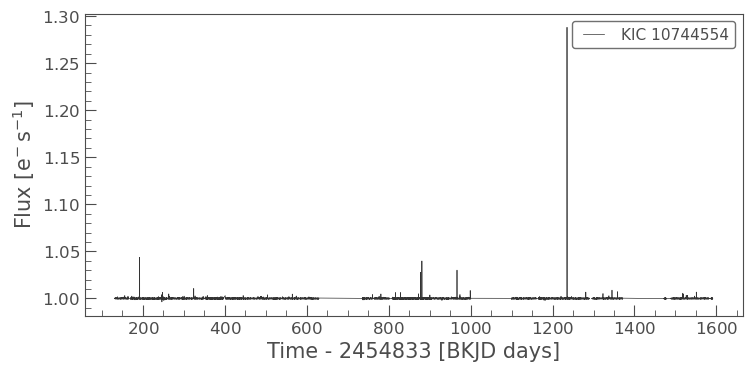

In [11]:

# make corrected light curves out of the pixel data using all quarters, detrended by .flatten()
# the .correct() function removes signals correlated with the CBVs
temp_lc = pixelfile[0].to_lightcurve();
corr_lc =  KeplerCBVCorrector(temp_lc).correct(cbvs=[1,2,3,4,5]).flatten()
for pf in pixelfile[1:]:
    temp_lc = pf.to_lightcurve()
    corr_lc = corr_lc.append(KeplerCBVCorrector(temp_lc).correct(cbvs=[1,2,3,4,5]).flatten())
corr_lc.remove_nans().remove_outliers()
corr_lc.plot();
# plt.ylim(1-0.01, 1+0.01);

Text(0.5, 1.0, 'Uncorrected Flux')

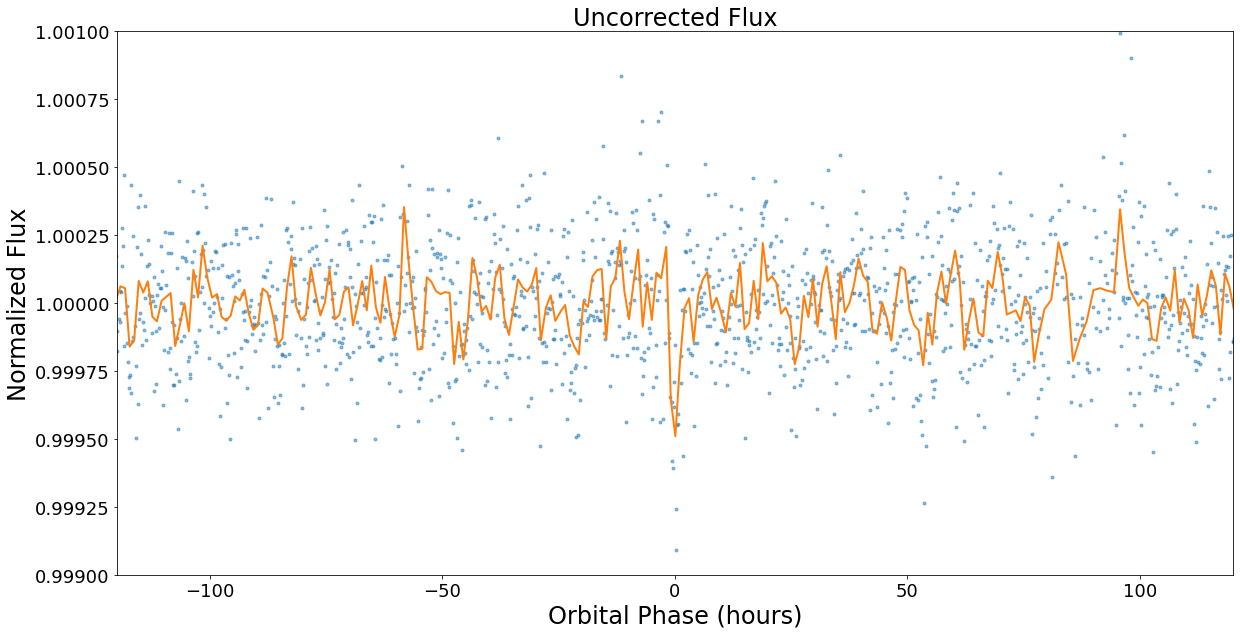

In [12]:
# plot the folded light curve by period and epoch
period = 390.619;
epoch = 451.02;

xRangeHours = 120
yRange = 1e-3
binFactor = 6
periodHours = period*24

foldedLc = lc.fold(period = period, t0=epoch)
foldedBinnedLc = lc.fold(period = period, t0=epoch).bin(binFactor).remove_outliers()

plt.figure(figsize=(20,10))
plt.plot(foldedLc.phase*periodHours, foldedLc.flux, '.', alpha=0.5)
plt.plot(foldedBinnedLc.phase*periodHours, foldedBinnedLc.flux, lw=2)
plt.xlim(-xRangeHours, xRangeHours)
plt.ylim(1-yRange, 1+yRange);
plt.tick_params(labelsize = 18)
plt.xlabel("Orbital Phase (hours)", fontsize = 24)
plt.ylabel("Normalized Flux", fontsize = 24)
plt.title("Uncorrected Flux", fontsize = 24)


Text(0.5, 1.0, 'Corrected Flux')

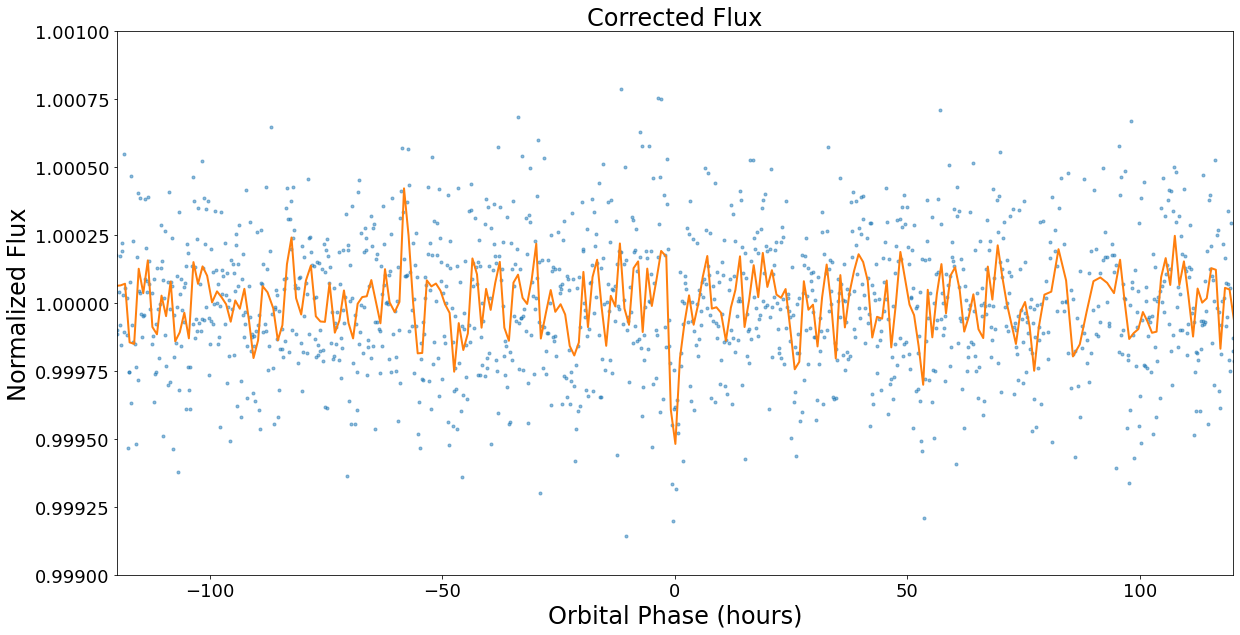

In [13]:
foldedCorrectedLc = corr_lc.fold(period = period, t0=epoch)
foldedBinnedCorrectedLc = corr_lc.fold(period = period, t0=epoch).bin(binFactor).remove_outliers()

plt.figure(figsize=(20,10))
plt.plot(foldedCorrectedLc.phase*periodHours, foldedCorrectedLc.flux, '.', alpha=0.5)
plt.plot(foldedBinnedCorrectedLc.phase*periodHours, foldedBinnedCorrectedLc.flux, lw=2)
plt.xlim(-xRangeHours, xRangeHours)
plt.ylim(1-yRange, 1+yRange);
plt.tick_params(labelsize = 18)
plt.xlabel("Orbital Phase (hours)", fontsize = 24)
plt.ylabel("Normalized Flux", fontsize = 24)
plt.title("Corrected Flux", fontsize = 24)


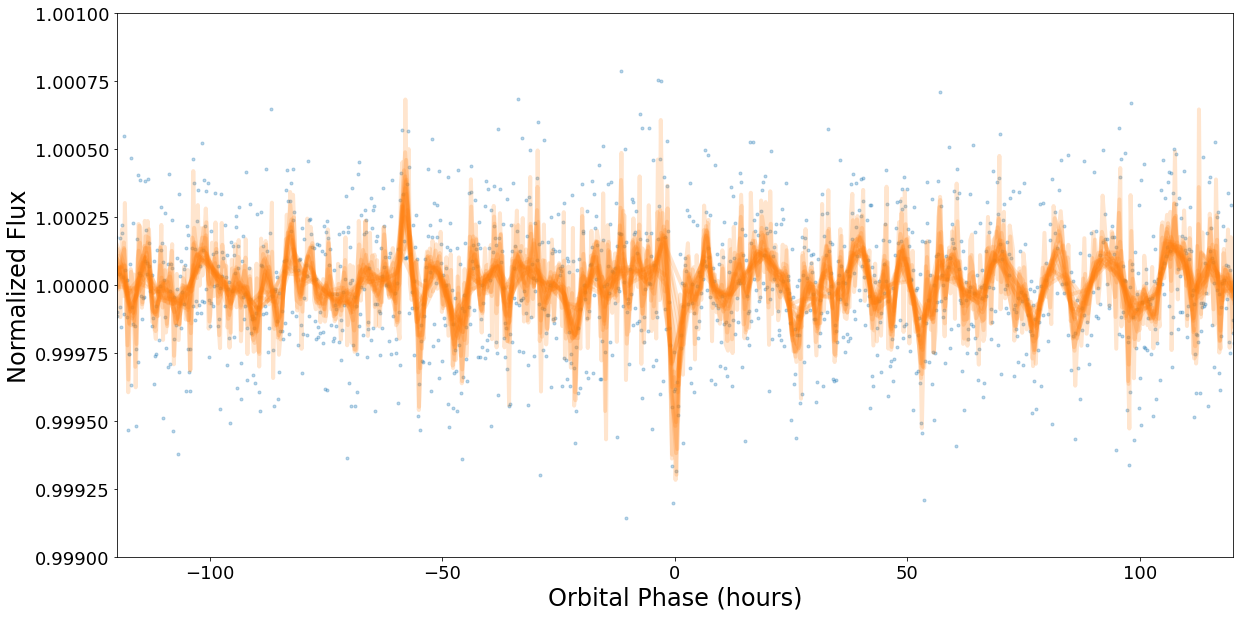

In [18]:
import numpy as np
defaultColors = plt.rcParams['axes.prop_cycle'].by_key()['color']

binFactors = range(2,20,1)

plt.figure(figsize=(20,10))
plt.plot(foldedCorrectedLc.phase*periodHours, foldedCorrectedLc.flux, '.', alpha=0.3)
for binFactor in binFactors:
    lc = corr_lc.fold(period = period, t0=epoch).bin(binFactor).remove_outliers()
    plt.plot(lc.phase*periodHours, lc.flux, color=defaultColors[1], lw=4, alpha = 0.2)
plt.xlim(-xRangeHours, xRangeHours)
plt.ylim(1-yRange, 1+yRange);
plt.tick_params(labelsize = 18)
plt.xlabel("Orbital Phase (hours)", fontsize = 24)
plt.ylabel("Normalized Flux", fontsize = 24)
# plt.title("Corrected Flux", fontsize = 24)
plt.savefig("TCE10744554-01.pdf",facecolor='white', transparent=False, bbox_inches='tight')


In [ ]:
duration = 4.68*(1.596**(-1/3))*((390.619/365.25)**(1/3))
print("duration is " + str(duration) + " times as long as an Earth transit")

In [ ]:
390.619/365.25

In [ ]:
1.596**(-1/3)

In [ ]:
print("duration is " + str(duration*13) + " hours")

In [ ]:
import numpy as np
durationImpact = duration*np.sqrt(1 - (0.59)**2)
print("duration with impact parameter is " + str(durationImpact*13) + " hours")
